In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the file

df = pd.read_csv('50_Startups.csv')

In [3]:
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# Divide the data into dependents vs independents

X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [7]:
X

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [8]:
y

array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
       156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
       141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
       124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
       108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
        99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
        90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
        71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
        35673.41,  14681.4 ])

In [9]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
len(X_train)

40

In [11]:
len(X_test)

10

In [12]:
X_test

array([142107.34,  44069.95,  91749.16, 162597.7 , 101913.08,  46426.07,
            0.  ,  23640.93,  65605.48,  64664.71])

In [13]:
y_test

array([166187.94,  89949.14, 124266.9 , 191792.06, 146121.95,  96712.8 ,
        42559.73,  71498.49, 101004.64, 107404.34])

In [14]:
X_train

array([ 72107.6 ,  78389.47, 130298.13, 123334.88, 144372.41,  38558.51,
        66051.52, 134615.46,   1000.23,      0.  , 114523.61, 165349.2 ,
        27892.92,  46014.02,  77044.01,  78013.11,  61136.38, 153441.51,
        28663.76,  73994.56,  20229.59,  22177.74,  15505.73,    542.05,
        86419.7 ,  94657.16, 120542.52,  28754.33,  55493.95,  93863.75,
        61994.48, 119943.24,  76253.86,  63408.86,   1315.46,  91992.39,
        67532.53, 131876.9 ,  75328.87, 100671.96])

In [15]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [16]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
X_test

array([[ 1.53386378],
       [-0.66061563],
       [ 0.4066409 ],
       [ 1.99252219],
       [ 0.63415117],
       [-0.60787599],
       [-1.6470821 ],
       [-1.117901  ],
       [-0.17856203],
       [-0.19962032]])

In [18]:
# Create LR Model

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# Predictions

y_pred = regressor.predict(X_test)

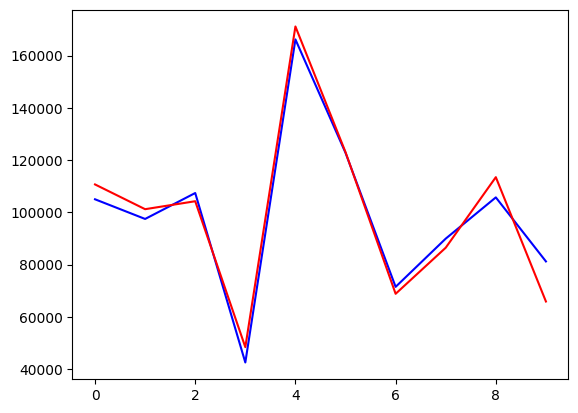

In [30]:
# Plotting of y_test vs y_pred

plt.plot(y_test, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.show()

Out of the box Predictions

In [31]:
data = [[80000]]

new_df = pd.DataFrame(data)

In [32]:
new_df = sc.transform(new_df)

In [33]:
new_df

array([[0.0558923]])

In [34]:
single = regressor.predict(new_df)

In [35]:
print(single)

[117506.99801989]
